In [1]:
import cv2
import numpy as np
from src import arucoAnalisis

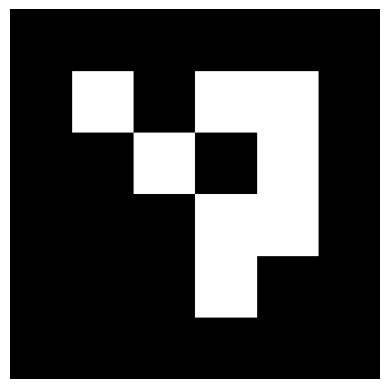

In [2]:
tool = arucoAnalisis.Toolset(cv2.aruco.DICT_4X4_50)
img = tool.generate_marker_img(0)
arucoAnalisis.cv2_imshow(img)

In [3]:
for i in range(0, 6):
    img = tool.generate_marker_img(i)
    cv2.imwrite(f'img/marker_{i}.png', img)

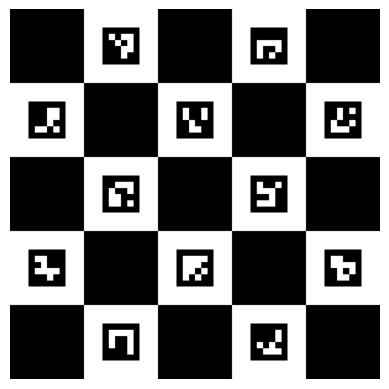

True

In [4]:
board, boardImg = tool.generate_board((5,5), 0.07, 0.035, 1000, 0)
arucoAnalisis.cv2_imshow(boardImg)

cv2.imwrite('img/calibration_board.png', boardImg)

In [5]:
imgs = [cv2.imread(f'img/camera-1/out{i}.png') for i in range(1, 21)]

obsCamera = arucoAnalisis.Camera(0, 'OBS_virtual_camera')
cameraCalib, cameraPose = obsCamera.calibrate_camera(imgs, board)
print(cameraCalib.camera_matrix)

[[1.06777780e+03 0.00000000e+00 3.16745421e+02]
 [0.00000000e+00 1.09912085e+03 6.39024326e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


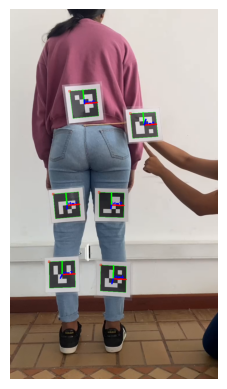

In [6]:
calibImgs = [cv2.imread(f'img/test-1/acalib{i}.png') for i in range(1, 18)]
markers, out = tool.detect_markers_calibration(calibImgs[0], cameraCalibration=cameraCalib, marker_length=0.11)
arucoAnalisis.cv2_imshow(out)

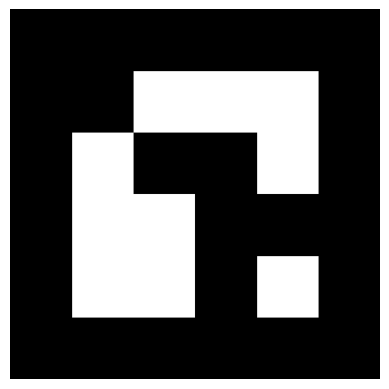

In [7]:
arucoAnalisis.cv2_imshow(markers[3].img)

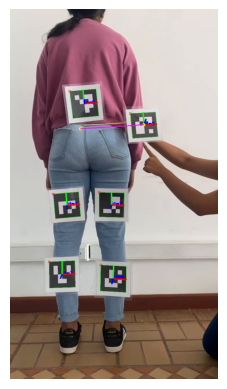

In [8]:
newPointer = arucoAnalisis.Segment(1, 'pointer2', markers[3])
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[-0.275,0.0,0.0]]])

b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

In [9]:
absPose = newPointer.landmarks[0].absolutePoses[-1]
print(absPose)

Pose(rvec=[[[ 2.93621645 -0.0989001   0.01901618]]], tvec=[[[-0.08996145 -0.27015987  1.32708456]]])


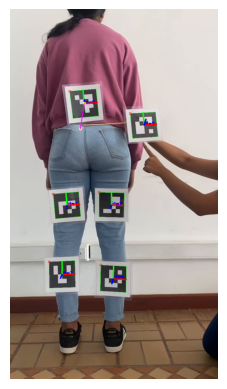

In [10]:
pelvis = arucoAnalisis.Segment(2, 'pelvis', markers[0])
pelvis.clear_landmarks()
pelvis.add_landmark_from_absoluteLocation(pose=absPose)
b = pelvis.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

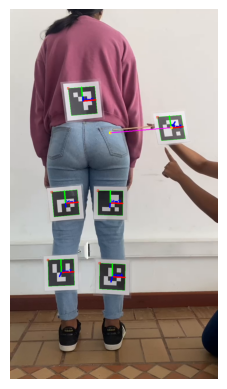

In [11]:
markers, out = tool.detect_markers_run(calibImgs[1], markers, cameraCalibration=cameraCalib, marker_length=0.11)
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

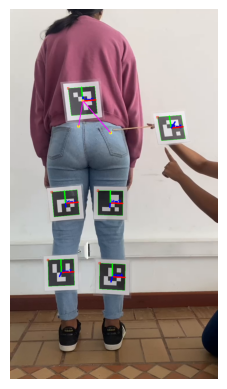

In [12]:
absPose = newPointer.landmarks[0].absolutePoses[-1]
pelvis.add_landmark_from_absoluteLocation(pose=absPose)
b = pelvis.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

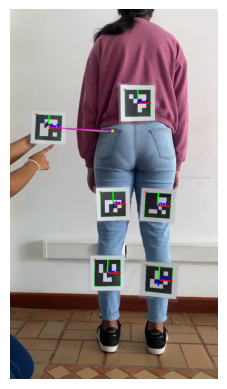

In [13]:
markers, out = tool.detect_markers_run(calibImgs[9], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

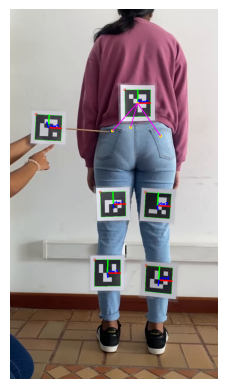

In [14]:
absPose = newPointer.landmarks[0].absolutePoses[-1]
pelvis.add_landmark_from_absoluteLocation(pose=absPose)
b = pelvis.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

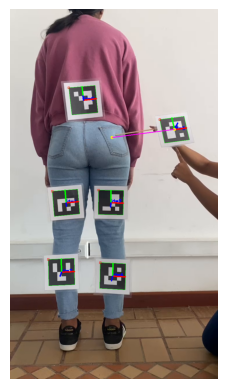

In [15]:
markers, out = tool.detect_markers_run(calibImgs[2], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[-0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

In [16]:
absPose = newPointer.landmarks[0].absolutePoses[-1]

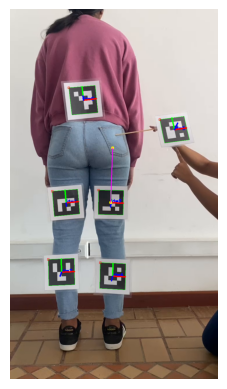

In [17]:
right_femur = arucoAnalisis.Segment(3, 'Thighbone', markers[5])
right_femur.clear_landmarks()
right_femur.add_landmark_from_absoluteLocation(pose=absPose)
b = right_femur.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

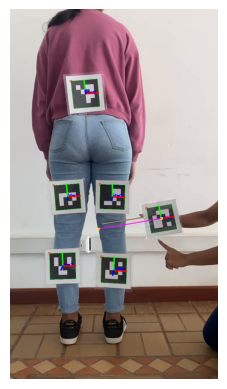

In [18]:
markers, out = tool.detect_markers_run(calibImgs[3], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[-0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

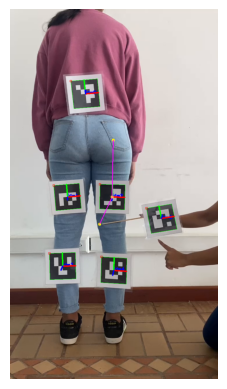

In [19]:
absPose = newPointer.landmarks[0].absolutePoses[-1]
right_femur.add_landmark_from_absoluteLocation(pose=absPose)
b = right_femur.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

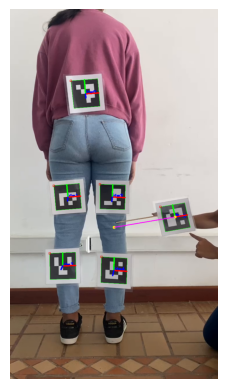

In [20]:
markers, out = tool.detect_markers_run(calibImgs[4], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[-0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

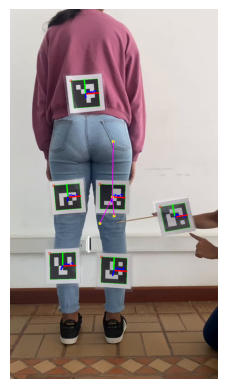

In [21]:
absPose = newPointer.landmarks[0].absolutePoses[-1]
right_femur.add_landmark_from_absoluteLocation(pose=absPose)
b = right_femur.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

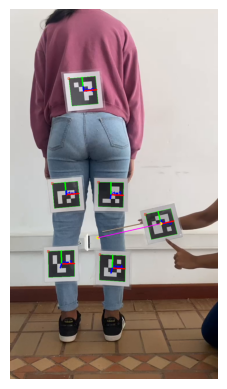

In [22]:
markers, out = tool.detect_markers_run(calibImgs[5], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[-0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

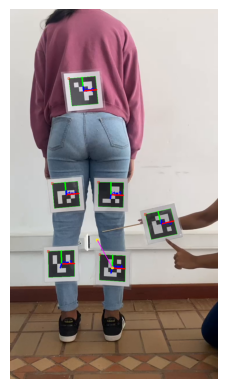

In [23]:
absPose = newPointer.landmarks[0].absolutePoses[-1]
right_tibula = arucoAnalisis.Segment(4, 'Fibula/Tibia', markers[2])
right_tibula.clear_landmarks()
right_tibula.add_landmark_from_absoluteLocation(pose=absPose)
b = right_tibula.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

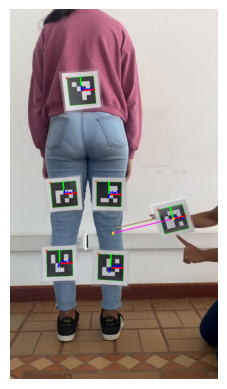

In [24]:
markers, out = tool.detect_markers_run(calibImgs[6], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[-0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

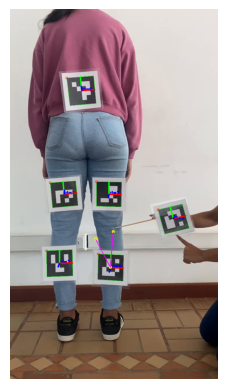

In [25]:
right_tibula.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = right_tibula.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

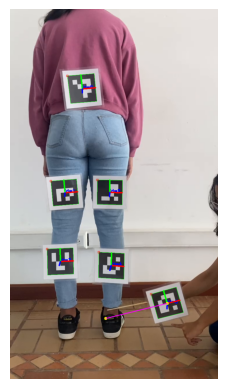

In [26]:
markers, out = tool.detect_markers_run(calibImgs[7], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[-0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

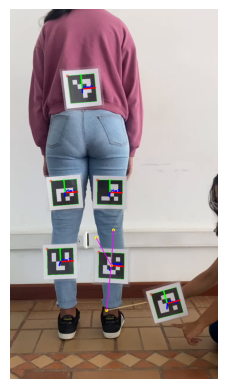

In [27]:
right_tibula.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = right_tibula.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

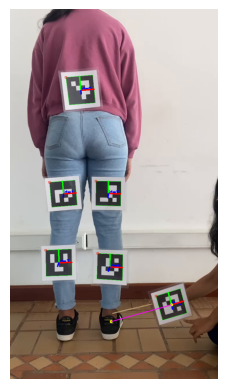

In [28]:
markers, out = tool.detect_markers_run(calibImgs[8], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[-0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

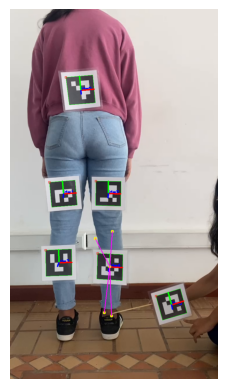

In [29]:
right_tibula.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = right_tibula.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

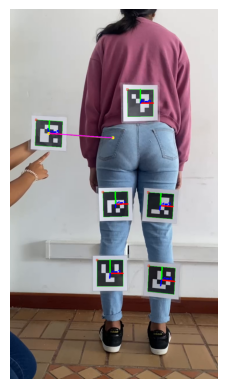

In [30]:
markers, out = tool.detect_markers_run(calibImgs[10], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

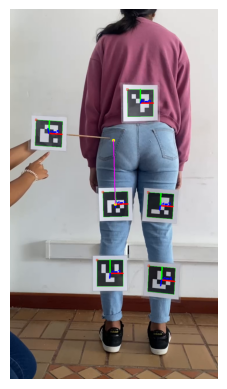

In [31]:
left_femur = arucoAnalisis.Segment(5, 'Thighbone', markers[4])
left_femur.clear_landmarks()
left_femur.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = left_femur.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

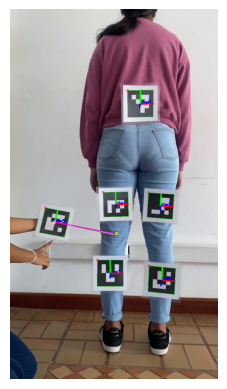

In [32]:
markers, out = tool.detect_markers_run(calibImgs[11], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

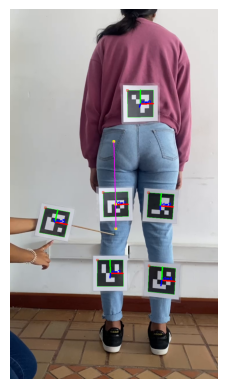

In [33]:
left_femur.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = left_femur.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

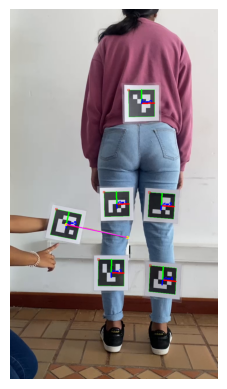

In [34]:
markers, out = tool.detect_markers_run(calibImgs[12], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

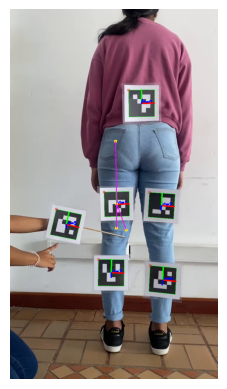

In [35]:
left_femur.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = left_femur.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

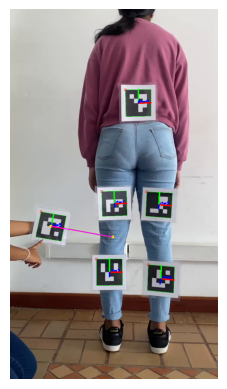

In [36]:
markers, out = tool.detect_markers_run(calibImgs[13], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

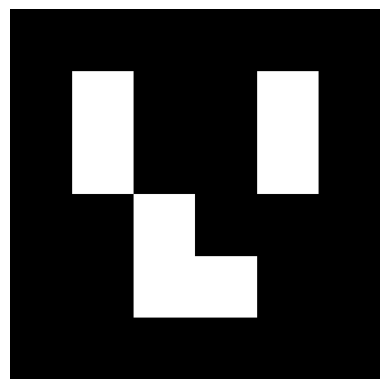

In [37]:
arucoAnalisis.cv2_imshow(markers[1].img)

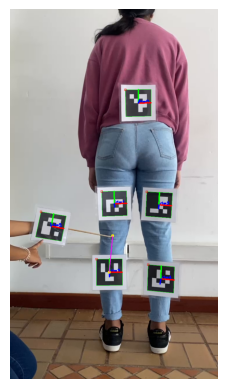

In [38]:
left_tiubla = arucoAnalisis.Segment(6, 'Fibula/Tibia', markers[1])
left_tiubla.clear_landmarks()
left_tiubla.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = left_tiubla.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

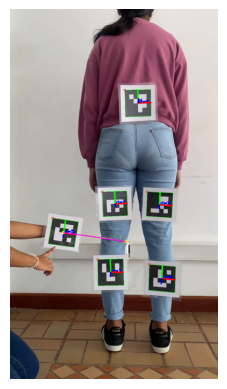

In [39]:
markers, out = tool.detect_markers_run(calibImgs[14], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

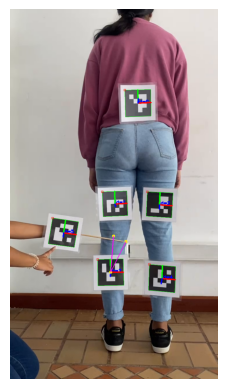

In [40]:
left_tiubla.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = left_tiubla.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

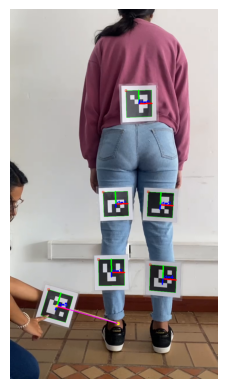

In [41]:
markers, out = tool.detect_markers_run(calibImgs[15], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

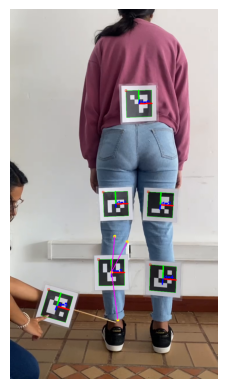

In [42]:
left_tiubla.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = left_tiubla.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

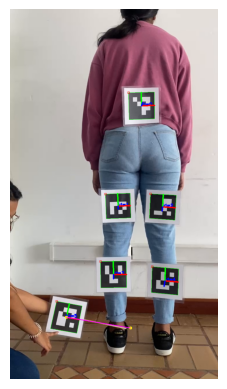

In [43]:
markers, out = tool.detect_markers_run(calibImgs[16], markers, cameraCalibration=cameraCalib, marker_length=0.11)
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[0.275,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

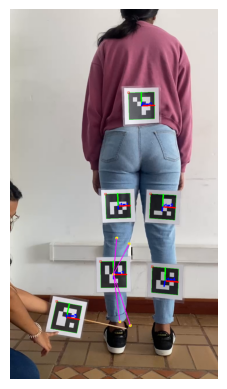

In [44]:
left_tiubla.add_landmark_from_absoluteLocation(pose=newPointer.landmarks[0].absolutePoses[-1])
b = left_tiubla.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

In [45]:
testImgs = [cv2.imread(f'img/test-1/img{i}.png') for i in range(0, 2)]
markers, out = tool.detect_markers_run(testImgs[0], markers, cameraCalibration=cameraCalib, marker_length=0.11)


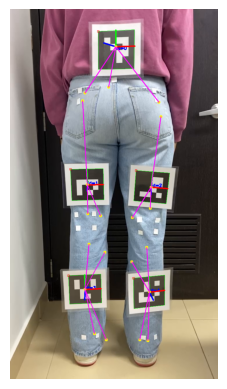

In [46]:
b = right_femur.draw_landmarks(out, cameraCalib)
b = left_femur.draw_landmarks(b, cameraCalib)
b = right_tibula.draw_landmarks(b, cameraCalib)
b = left_tiubla.draw_landmarks(b, cameraCalib)
b = pelvis.draw_landmarks(b, cameraCalib)
arucoAnalisis.cv2_imshow(b)

In [47]:
cv2.imwrite('img/test-1/out1.png', b)

True

In [48]:
cap = cv2.VideoCapture("vid/test-2.mp4") # 0 for default camera and 1 for OBS camera, for file use cv2.VideoCapture('file.mp4')

if not cap.isOpened():
    print('[ERROR] Error opening video')
    exit(1)

count = 0
imgs = []
gray = any

while (cap.isOpened()):
    print(f'[INFO] Reading frame {count}')
    ret, frame = cap.read()

    if ret:
        imgs.append(frame)
        count += 1
        continue
    else:
        break

cap.release()

[INFO] Reading frame 0
[INFO] Reading frame 1
[INFO] Reading frame 2
[INFO] Reading frame 3
[INFO] Reading frame 4
[INFO] Reading frame 5
[INFO] Reading frame 6
[INFO] Reading frame 7
[INFO] Reading frame 8
[INFO] Reading frame 9
[INFO] Reading frame 10
[INFO] Reading frame 11
[INFO] Reading frame 12
[INFO] Reading frame 13
[INFO] Reading frame 14
[INFO] Reading frame 15
[INFO] Reading frame 16
[INFO] Reading frame 17
[INFO] Reading frame 18
[INFO] Reading frame 19
[INFO] Reading frame 20
[INFO] Reading frame 21
[INFO] Reading frame 22
[INFO] Reading frame 23
[INFO] Reading frame 24
[INFO] Reading frame 25
[INFO] Reading frame 26
[INFO] Reading frame 27
[INFO] Reading frame 28
[INFO] Reading frame 29
[INFO] Reading frame 30
[INFO] Reading frame 31
[INFO] Reading frame 32
[INFO] Reading frame 33
[INFO] Reading frame 34
[INFO] Reading frame 35
[INFO] Reading frame 36
[INFO] Reading frame 37
[INFO] Reading frame 38
[INFO] Reading frame 39
[INFO] Reading frame 40
[INFO] Reading frame 41
[I

In [49]:
import matplotlib.pyplot as plt

In [50]:
height, width, layers = imgs[0].shape
size = (width,height)
outvid = cv2.VideoWriter('vid/detected_test_02.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 60, size) # 60 fps

for i in range(len(imgs)-1):
    markers, out = tool.detect_markers_run(imgs[i], markers, cameraCalibration=cameraCalib, marker_length=0.11)
    b = right_femur.draw_landmarks(out, cameraCalib)
    b = left_femur.draw_landmarks(b, cameraCalib)
    b = right_tibula.draw_landmarks(b, cameraCalib)
    b = left_tiubla.draw_landmarks(b, cameraCalib)
    b = pelvis.draw_landmarks(b, cameraCalib)
    outvid.write(b)

outvid.release()

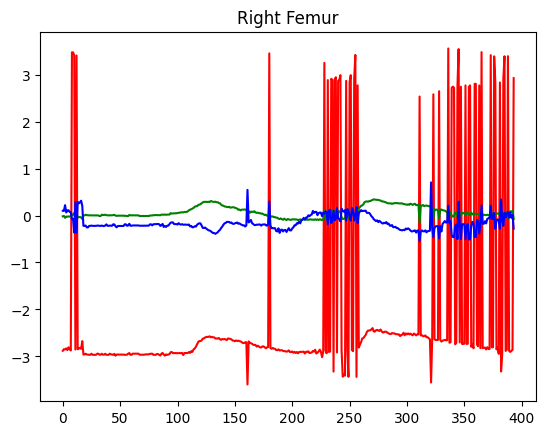

In [51]:
rvecs = []
xr, yr, zr = [], [], []

for pose in right_femur.marker.poses:
    rvecs.append(pose.rvec)
    xr.append(pose.rvec[0][0][0])
    yr.append(pose.rvec[0][0][1])
    zr.append(pose.rvec[0][0][2])

np.save('data/right_femur_rvecs.npy', rvecs)

plt.figure()
plt.title('Right Femur')
plt.plot(xr, label='x', color='red')
plt.plot(yr, label='y', color='green')
plt.plot(zr, label='z', color='blue')
plt.show()

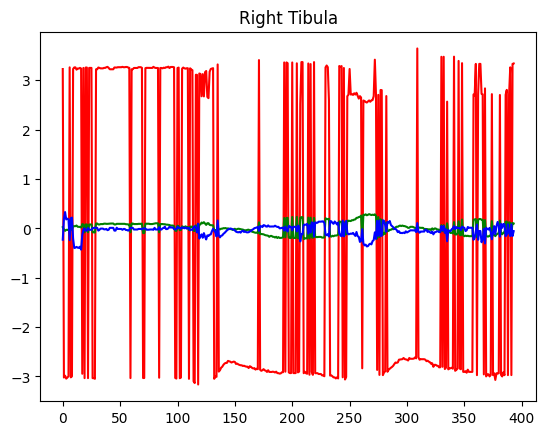

In [52]:
rvecs = []
xr, yr, zr = [], [], []

for pose in right_tibula.marker.poses:
    rvecs.append(pose.rvec)
    xr.append(pose.rvec[0][0][0])
    yr.append(pose.rvec[0][0][1])
    zr.append(pose.rvec[0][0][2])

np.save('data/right_tibula_rvecs.npy', rvecs)

plt.figure()
plt.title('Right Tibula')
plt.plot(xr, label='x', color='red')
plt.plot(yr, label='y', color='green')
plt.plot(zr, label='z', color='blue')
plt.show()

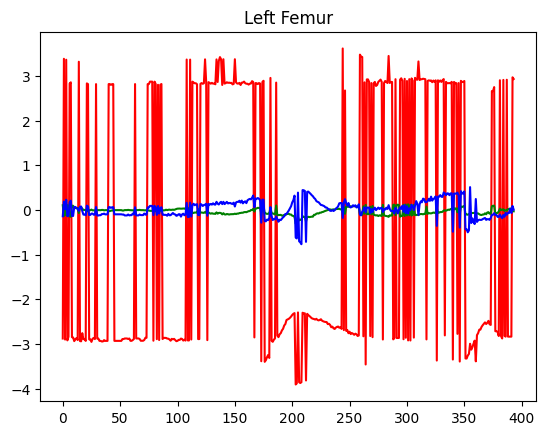

In [53]:
rvecs = []
xr, yr, zr = [], [], []

for pose in left_femur.marker.poses:
    rvecs.append(pose.rvec)
    xr.append(pose.rvec[0][0][0])
    yr.append(pose.rvec[0][0][1])
    zr.append(pose.rvec[0][0][2])

np.save('data/left_femur_rvecs.npy', rvecs)

plt.figure()
plt.title('Left Femur')
plt.plot(xr, label='x', color='red')
plt.plot(yr, label='y', color='green')
plt.plot(zr, label='z', color='blue')
plt.show()

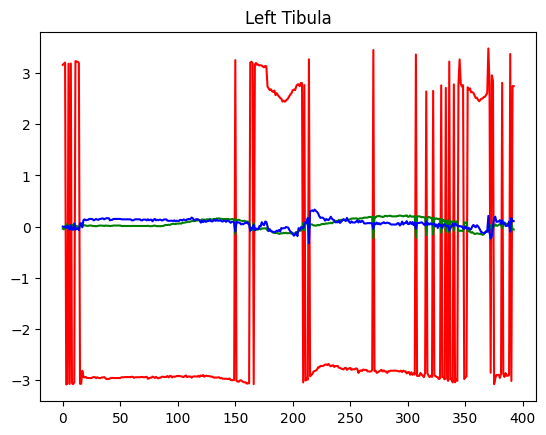

In [54]:
rvecs = []
xr, yr, zr = [], [], []

for pose in left_tiubla.marker.poses:
    rvecs.append(pose.rvec)
    xr.append(pose.rvec[0][0][0])
    yr.append(pose.rvec[0][0][1])
    zr.append(pose.rvec[0][0][2])

np.save('data/left_tibula_rvecs.npy', rvecs)

plt.figure()
plt.title('Left Tibula')
plt.plot(xr, label='x', color='red')
plt.plot(yr, label='y', color='green')
plt.plot(zr, label='z', color='blue')
plt.show()

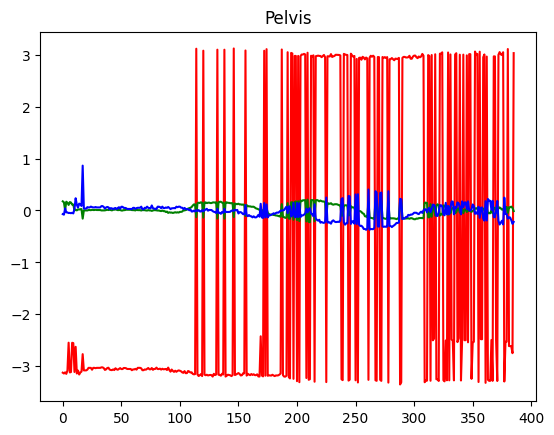

In [55]:
rvecs = []
xr, yr, zr = [], [], []

for pose in pelvis.marker.poses:
    rvecs.append(pose.rvec)
    xr.append(pose.rvec[0][0][0])
    yr.append(pose.rvec[0][0][1])
    zr.append(pose.rvec[0][0][2])

np.save('data/pelvis_rvecs.npy', rvecs)

plt.figure()
plt.title('Pelvis')
plt.plot(xr, label='x', color='red')
plt.plot(yr, label='y', color='green')
plt.plot(zr, label='z', color='blue')
plt.show()